In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the top 10 features' dataset
df = pd.read_csv('../data/top_features.csv', index_col=0)

# For demonstration, let's predict the first feature as the target (e.g., PM2.5 or another AQ variable)
target_column = df.columns[0]
X = df.drop(columns=[target_column])
y = df[target_column]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluation

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression on Top Features:")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")


Linear Regression on Top Features:
RMSE: 60.1521
R²:   -0.0017


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor on Top Features:")
print(f"RMSE: {rmse_rf:.4f}")
print(f"R²:   {r2_rf:.4f}") #pls dont't curse on why i used R², it's just for demonstration purposes


Random Forest Regressor on Top Features:
RMSE: 60.5943
R²:   -0.0165


In [8]:
from xgboost import XGBRegressor

# XGBoost Regressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Evaluation
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Regressor on Top Features:")
print(f"RMSE: {rmse_xgb:.4f}")
print(f"R²:   {r2_xgb:.4f}")

XGBoost Regressor on Top Features:
RMSE: 61.4067
R²:   -0.0439


In [10]:
from sklearn.ensemble import RandomForestRegressor

# Load Autoencoder features
df_auto = pd.read_csv('../data/autoencoder_features.csv', index_col=0)

# Use same target as before (for fair comparison)
df_target = pd.read_csv('../data/top_features.csv', index_col=0)
target_column = df_target.columns[0]
y_auto = df_target[target_column]

# Align index if needed
df_auto = pd.read_csv('../data/autoencoder_features.csv')
df_auto.index = df_target.index  # force the same index as top_features.csv

# Train/test split
X_train_ae, X_test_ae, y_train_ae, y_test_ae = train_test_split(df_auto, y_auto, test_size=0.2, random_state=42)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_ae, y_train_ae)
y_pred_ae = rf.predict(X_test_ae)

# Evaluation
rmse_rf = np.sqrt(mean_squared_error(y_test_ae, y_pred_ae))
r2_rf = r2_score(y_test_ae, y_pred_ae)

print("Random Forest on Autoencoder Features:")
print(f"RMSE: {rmse_rf:.4f}")
print(f"R²:   {r2_rf:.4f}")


Random Forest on Autoencoder Features:
RMSE: 56.6124
R²:   0.1127


In [11]:
import pandas as pd

baseline_results = pd.DataFrame({
    'Model': [
        'Linear Regression',
        'Random Forest Regressor',
        'XGBoost Regressor',
        'Random Forest (Autoencoder)'
    ],
    'Feature Set': [
        'Top Features',
        'Top Features',
        'Top Features',
        'Autoencoder Features'
    ],
    'RMSE': [60.1521, 60.5943, 61.4067, 56.6124],
    'R2': [-0.0017, -0.0165, -0.0439, 0.1127]
})

baseline_results.to_csv('../data/baseline_results.csv', index=False)
print("Baseline results saved to '../data/baseline_results.csv'")


Baseline results saved to '../data/baseline_results.csv'


In [12]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load PCA features and the original target
df_pca = pd.read_csv('../data/pca_features.csv', index_col=0)
df_target = pd.read_csv('../data/top_features.csv', index_col=0)

# Use the same target variable as before
target_column = df_target.columns[0]
y_pca = df_target[target_column]

# Align index (important!)
df_pca.index = pd.to_datetime(df_pca.index)
y_pca.index = pd.to_datetime(y_pca.index)
df_pca = df_pca.loc[y_pca.index]

# Train/test split
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(df_pca, y_pca, test_size=0.2, random_state=42)

# Train Random Forest
rf_pca = RandomForestRegressor(random_state=42)
rf_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = rf_pca.predict(X_test_pca)

# Evaluate
rmse_pca = np.sqrt(mean_squared_error(y_test_pca, y_pred_pca))
r2_pca = r2_score(y_test_pca, y_pred_pca)

print("🔹 Random Forest on PCA Features:")
print(f"RMSE: {rmse_pca:.4f}")
print(f"R²:   {r2_pca:.4f}")


🔹 Random Forest on PCA Features:
RMSE: 35.7497
R²:   0.6462


In [1]:
results = pd.DataFrame({
    'Model': [
        'Linear Regression (Top Features)',
        'Random Forest (Top Features)',
        'XGBoost (Top Features)',
        'Random Forest (Autoencoder Features)',
        'Random Forest (PCA Features)'
    ],
    'RMSE': [60.1521, 60.5943, 61.4067, 56.6124, rmse_pca],
    'R2':   [-0.0017, -0.0165, -0.0439, 0.1127, r2_pca]
})

results.to_csv('../data/baseline_results.csv', index=False)
print("Saved all model results to '../data/baseline_results.csv'")


NameError: name 'pd' is not defined

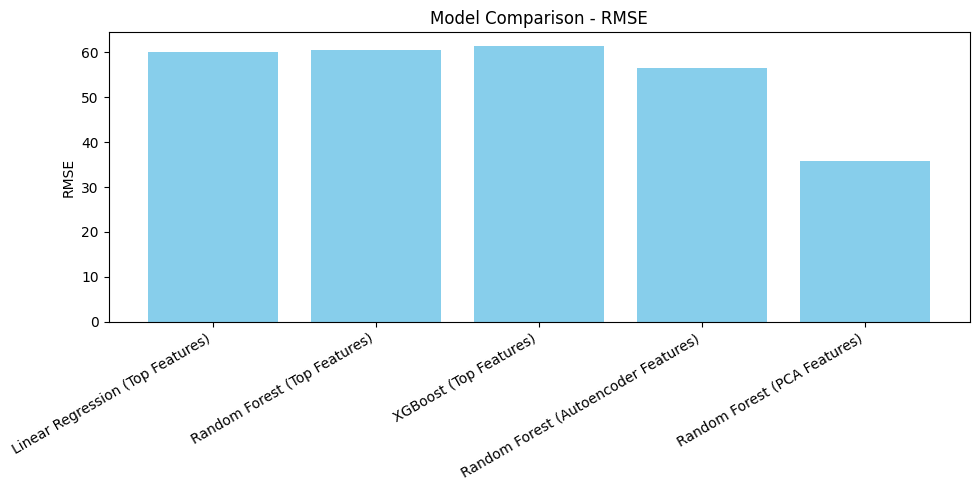

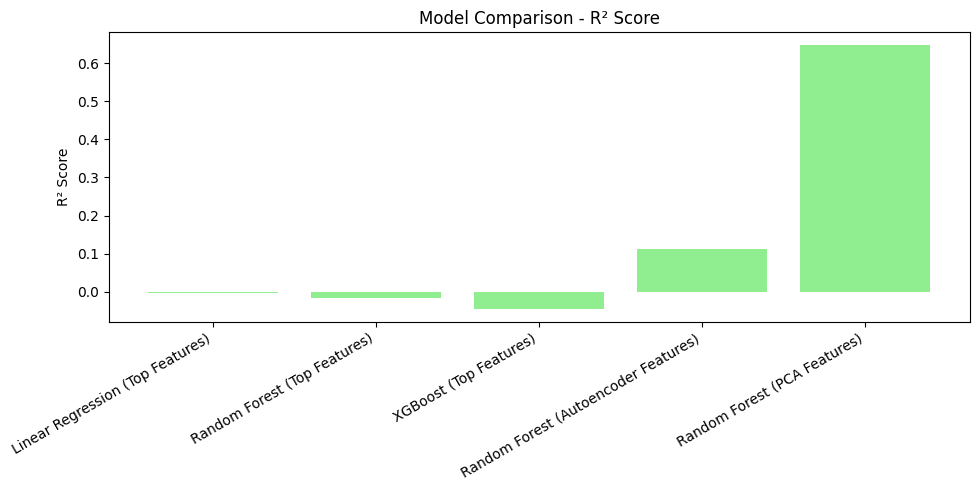

In [14]:
import matplotlib.pyplot as plt

# Reload results
results = pd.read_csv('../data/baseline_results.csv')

# Plot RMSE
plt.figure(figsize=(10, 5))
plt.bar(results['Model'], results['RMSE'], color='skyblue')
plt.ylabel('RMSE')
plt.title('Model Comparison - RMSE')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

# Plot R²
plt.figure(figsize=(10, 5))
plt.bar(results['Model'], results['R2'], color='lightgreen')
plt.ylabel('R² Score')
plt.title('Model Comparison - R² Score')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()
